In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings 
import glob

warnings.filterwarnings('ignore')

In [2]:
glob.glob('*')

['untitled1.py',
 'untitled3.py',
 'untitled.py',
 'untitled2.py',
 'Automobile_data.csv',
 'automobile.ipynb']

In [3]:
df=pd.read_csv('Automobile_data.csv')
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [4]:
df.shape

(205, 26)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [6]:
df['normalized-losses'].unique()

array(['?', '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

In [7]:
for col in df:
    a=df[col].unique()
    if '?' in a :
        print(col,list(df[col]).count('?'))

normalized-losses 41
num-of-doors 2
bore 4
stroke 4
horsepower 2
peak-rpm 2
price 4


In [8]:
df=df.replace('?',np.nan)
df['normalized-losses']=df['normalized-losses'].astype(float)

In [9]:
from scipy.stats import mode
df[['make','normalized-losses']].dropna().groupby(['make'])['normalized-losses'].apply(pd.Series.mode)

make            
audi           0    158.0
               1    164.0
bmw            0    188.0
               1    192.0
chevrolet      0     81.0
               1     98.0
               2    121.0
dodge          0    148.0
honda          0     85.0
               1    101.0
jaguar         0    145.0
mazda          0    150.0
mercedes-benz  0     93.0
mitsubishi     0    161.0
nissan         0    128.0
peugot         0    161.0
plymouth       0    154.0
porsche        0    186.0
saab           0    104.0
               1    150.0
subaru         0    102.0
toyota         0     91.0
volkswagen     0     94.0
volvo          0     95.0
Name: normalized-losses, dtype: float64

In [10]:
df[df['make']=='chevrolet'][['make','normalized-losses']]

,make,normalized-losses
18,chevrolet,121.0
19,chevrolet,98.0
20,chevrolet,81.0


In [11]:
df[df['normalized-losses'].isnull()][['make','normalized-losses']]

,make,normalized-losses
0,alfa-romero,NaN
1,alfa-romero,NaN
2,alfa-romero,NaN
5,audi,NaN
7,audi,NaN
9,audi,NaN
14,bmw,NaN
15,bmw,NaN
16,bmw,NaN
17,bmw,NaN


In [12]:
df[df['num-of-doors'].isnull()][['num-of-doors','body-style','make']]

,num-of-doors,body-style,make
27,NaN,sedan,dodge
63,NaN,sedan,mazda


In [13]:
df['num-of-doors'].unique()

array(['two', 'four', nan], dtype=object)

In [14]:
df['num-of-doors']=df['num-of-doors'].map({'two':2,
                                          'four':4})

In [15]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,2.0,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,audi,gas,std,4.0,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164.0,audi,gas,std,4.0,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [16]:
df[['num-of-doors','body-style','make']].dropna().groupby(['body-style','make']).agg(pd.Series.mean)

num-of-doors
body-style  make                       
convertible alfa-romero        2.000000
            mercedes-benz      2.000000
            porsche            2.000000
            toyota             2.000000
            volkswagen         2.000000
hardtop     mercedes-benz      2.000000
            nissan             2.000000
            porsche            2.000000
            toyota             2.000000
hatchback   alfa-romero        2.000000
            audi               2.000000
            chevrolet          2.000000
            dodge              2.400000
            honda              2.000000
            isuzu              2.000000
            mazda              2.200000
            mercury            2.000000
            mitsubishi         2.000000
            nissan             2.400000
            plymouth           2.500000
            porsche            2.000000
            renault            2.000000
            saab               2.000000
            subaru             2.000000
            toyota             2.857143
            volkswagen         2.000000
sedan       audi               3.600000
            bmw                3.250000
            chevrolet          4.000000
            dodge              4.000000
            honda              3.600000
            isuzu              3.333333
            jaguar             3.333333
            mazda              4.000000
            mercedes-benz      4.000000
            mitsubishi         4.000000
            nissan             3.111111
            peugot             4.000000
            plymouth           4.000000
            saab               4.000000
            subaru             4.000000
            toyota             3.600000
            volkswagen         3.555556
            volvo              4.000000
wagon       audi               4.000000
            dodge              4.000000
            honda              4.000000
            mercedes-benz      4.000000
            nissan             4.000000
            peugot             4.000000
            plymouth           4.000000
            renault            4.000000
            subaru             4.000000
            toyota             4.000000
            volkswagen         4.000000
            volvo              4.000000

In [17]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,2.0,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,audi,gas,std,4.0,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164.0,audi,gas,std,4.0,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [18]:
df['num-of-doors']=df['num-of-doors'].fillna(4)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    float64
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [20]:
df['horsepower']=df['horsepower'].astype(float)
df['peak-rpm']=df['peak-rpm'].astype(float)
df[df['peak-rpm'].isnull()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
130,0,NaN,renault,gas,std,4.0,wagon,fwd,front,96.1,181.5,66.5,55.2,2579,ohc,four,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9295
131,2,NaN,renault,gas,std,2.0,hatchback,fwd,front,96.1,176.8,66.6,50.5,2460,ohc,four,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9895


In [21]:
df[['make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','num-of-cylinders','engine-size','fuel-system','horsepower','peak-rpm']].groupby(['make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','num-of-cylinders','engine-size','fuel-system']).mean().tail(60)

horsepower     peak-rpm
make       fuel-type aspiration num-of-doors body-style  drive-wheels num-of-cylinders engine-size fuel-system                         
plymouth   gas       turbo      2.0          hatchback   fwd          four             98          spdi              102.0  5500.000000
                                                         rwd          four             156         spdi              145.0  5000.000000
porsche    gas       std        2.0          convertible rwd          six              194         mpfi              207.0  5900.000000
                                             hardtop     rwd          six              194         mpfi              207.0  5900.000000
                                             hatchback   rwd          eight            203         mpfi              288.0  5750.000000
                                                                      four             151         mpfi              143.0  5500.000000
renault    gas       std        2.0          hatchback   fwd          four             132         mpfi                NaN          NaN
                                4.0          wagon       fwd          four             132         mpfi                NaN          NaN
saab       gas       std        2.0          hatchback   fwd          four             121         mpfi              110.0  5250.000000
                                4.0          sedan       fwd          four             121         mpfi              110.0  5250.000000
                     turbo      2.0          hatchback   fwd          four             121         mpfi              160.0  5500.000000
                                4.0          sedan       fwd          four             121         mpfi              160.0  5500.000000
subaru     gas       std        2.0          hatchback   4wd          four             108         2bbl               73.0  4400.000000
                                                         fwd          four             97          2bbl               69.0  4900.000000
                                                                                       108         2bbl               73.0  4400.000000
                                4.0          sedan       4wd          four             108         2bbl               82.0  4800.000000
                                                         fwd          four             108         2bbl               82.0  4600.000000
                                                                                                   mpfi               94.0  5200.000000
                                             wagon       4wd          four             108         2bbl               82.0  4800.000000
                                                         fwd          four             108         2bbl               82.0  4800.000000
                                                                                                   mpfi               94.0  5200.000000
                     turbo      4.0          sedan       4wd          four             108         mpfi              111.0  4800.000000
                                             wagon       4wd          four             108         mpfi              111.0  4800.000000
toyota     diesel    std        4.0          hatchback   fwd          four             110         idi                56.0  4500.000000
                                             sedan       fwd          four             110         idi                56.0  4500.000000
                     turbo      4.0          sedan       fwd          four             110         idi                73.0  4500.000000
           gas       std        2.0          convertible rwd          four             146         mpfi              116.0  4800.000000
                                             hardtop     rwd          four             146         mpfi              116.0  4800.000000
                                

In [22]:
df[(df['fuel-type']=='gas' )& (df['body-style']=='wagon') & (df['num-of-doors']==4) &( df['num-of-cylinders']=='four')][['horsepower','peak-rpm']].mode()

,horsepower,peak-rpm
0,62.0,4800.0
1,88.0,NaN


In [23]:
df['horsepower']=df['horsepower'].fillna(62)
df['peak-rpm']=df['peak-rpm'].fillna(4800)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    float64
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [25]:
df['bore']=df['bore'].astype(float)
df['stroke']=df['stroke'].astype(float)
df[df['bore'].isnull()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
55,3,150.0,mazda,gas,std,2.0,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,two,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,10945
56,3,150.0,mazda,gas,std,2.0,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,two,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,11845
57,3,150.0,mazda,gas,std,2.0,hatchback,rwd,front,95.3,169.0,65.7,49.6,2385,rotor,two,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,13645
58,3,150.0,mazda,gas,std,2.0,hatchback,rwd,front,95.3,169.0,65.7,49.6,2500,rotor,two,80,mpfi,NaN,NaN,9.4,135.0,6000.0,16,23,15645


In [26]:
df[(df['body-style']=='hatchback') & (df['num-of-doors']==2)][['bore','stroke']].mean()

bore      3.246786
stroke    3.278750
dtype: float64

In [27]:
df[(df['body-style']=='hatchback') & (df['num-of-doors']==2)][['bore','stroke']].mode()

,bore,stroke
0,3.03,3.23


In [28]:
df['bore']=df['bore'].fillna(3.03)
df['stroke']=df['stroke'].fillna(3.23)

In [29]:
mean=df[['make','normalized-losses']].dropna().groupby(['make'])['normalized-losses'].mean()

In [30]:
index=df[(df['normalized-losses'].isnull() )& (df['make']=='audi')]['normalized-losses'].index
index

Index([5, 7, 9], dtype='int64')

In [31]:
y=df['price']
df.drop('price',axis=1,inplace=True)

df.iloc[index]=df.iloc[index].fillna(161)

In [32]:
for i in zip(mean.index,mean):
    index=df[(df['normalized-losses'].isnull() )& (df['make']==i[0])]['normalized-losses'].index
    df.iloc[index]=df.iloc[index].fillna(i[1])


In [33]:
df[df['normalized-losses'].isnull()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,3,NaN,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27
1,3,NaN,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27
2,1,NaN,alfa-romero,gas,std,2.0,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26
43,0,NaN,isuzu,gas,std,4.0,sedan,rwd,front,94.3,170.7,61.8,53.5,2337,ohc,four,111,2bbl,3.31,3.23,8.5,78.0,4800.0,24,29
44,1,NaN,isuzu,gas,std,2.0,sedan,fwd,front,94.5,155.9,63.6,52.0,1874,ohc,four,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43
45,0,NaN,isuzu,gas,std,4.0,sedan,fwd,front,94.5,155.9,63.6,52.0,1909,ohc,four,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43
46,2,NaN,isuzu,gas,std,2.0,hatchback,rwd,front,96.0,172.6,65.2,51.4,2734,ohc,four,119,spfi,3.43,3.23,9.2,90.0,5000.0,24,29
75,1,NaN,mercury,gas,turbo,2.0,hatchback,rwd,front,102.7,178.4,68.0,54.8,2910,ohc,four,140,mpfi,3.78,3.12,8.0,175.0,5000.0,19,24
130,0,NaN,renault,gas,std,4.0,wagon,fwd,front,96.1,181.5,66.5,55.2,2579,ohc,four,132,mpfi,3.46,3.90,8.7,62.0,4800.0,23,31
131,2,NaN,renault,gas,std,2.0,hatchback,fwd,front,96.1,176.8,66.6,50.5,2460,ohc,four,132,mpfi,3.46,3.90,8.7,62.0,4800.0,23,31


In [34]:
print(df['normalized-losses'].mean())
print(df['normalized-losses'].mode())


126.40080507306314
0    161.0
Name: normalized-losses, dtype: float64


In [35]:
df['normalized-losses']

0        NaN
1        NaN
2        NaN
3      164.0
4      164.0
       ...  
200     95.0
201     95.0
202     95.0
203     95.0
204     95.0
Name: normalized-losses, Length: 205, dtype: float64

In [36]:
df['make'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [37]:
make=dict(zip(df['make'].unique(),range(len(df['make'].unique()))))
make

{'alfa-romero': 0,
 'audi': 1,
 'bmw': 2,
 'chevrolet': 3,
 'dodge': 4,
 'honda': 5,
 'isuzu': 6,
 'jaguar': 7,
 'mazda': 8,
 'mercedes-benz': 9,
 'mercury': 10,
 'mitsubishi': 11,
 'nissan': 12,
 'peugot': 13,
 'plymouth': 14,
 'porsche': 15,
 'renault': 16,
 'saab': 17,
 'subaru': 18,
 'toyota': 19,
 'volkswagen': 20,
 'volvo': 21}

In [38]:
df['make']=df['make'].map(make)

In [39]:
fuel_type=dict(zip(df['fuel-type'].unique(),range(len(df['fuel-type'].unique()))))
df['fuel-type']=df['fuel-type'].map(fuel_type)

In [40]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,3,NaN,0,0,std,2.0,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27
1,3,NaN,0,0,std,2.0,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27
2,1,NaN,0,0,std,2.0,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26
3,2,164.0,1,0,std,4.0,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30
4,2,164.0,1,0,std,4.0,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22


In [41]:
aspiration=dict(zip(df['aspiration'].unique(),range(len(df['aspiration'].unique()))))
df['aspiration']=df['aspiration'].map(aspiration)

body_style=dict(zip(df['body-style'].unique(),range(len(df['body-style'].unique()))))
df['body-style']=df['body-style'].map(body_style)

drivewheels=dict(zip(df['drive-wheels'].unique(),range(len(df['drive-wheels'].unique()))))
df['drive-wheels']=df['drive-wheels'].map(drivewheels)

enginelocation=dict(zip(df['engine-location'].unique(),range(len(df['engine-location'].unique()))))
df['engine-location']=df['engine-location'].map(enginelocation)

enginetype=dict(zip(df['engine-type'].unique(),range(len(df['engine-type'].unique()))))
df['engine-type']=df['engine-type'].map(enginetype)

numofcylinders=dict(zip(df['num-of-cylinders'].unique(),range(len(df['num-of-cylinders'].unique()))))
df['num-of-cylinders']=df['num-of-cylinders'].map(numofcylinders)

fuelsystem=dict(zip(df['fuel-system'].unique(),range(len(df['fuel-system'].unique()))))
df['fuel-system']=df['fuel-system'].map(fuelsystem)

In [42]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,3,NaN,0,0,0,2.0,0,0,0,88.6,168.8,64.1,48.8,2548,0,0,130,0,3.47,2.68,9.0,111.0,5000.0,21,27
1,3,NaN,0,0,0,2.0,0,0,0,88.6,168.8,64.1,48.8,2548,0,0,130,0,3.47,2.68,9.0,111.0,5000.0,21,27
2,1,NaN,0,0,0,2.0,1,0,0,94.5,171.2,65.5,52.4,2823,1,1,152,0,2.68,3.47,9.0,154.0,5000.0,19,26
3,2,164.0,1,0,0,4.0,2,1,0,99.8,176.6,66.2,54.3,2337,2,0,109,0,3.19,3.40,10.0,102.0,5500.0,24,30
4,2,164.0,1,0,0,4.0,2,2,0,99.4,176.6,66.4,54.3,2824,2,2,136,0,3.19,3.40,8.0,115.0,5500.0,18,22


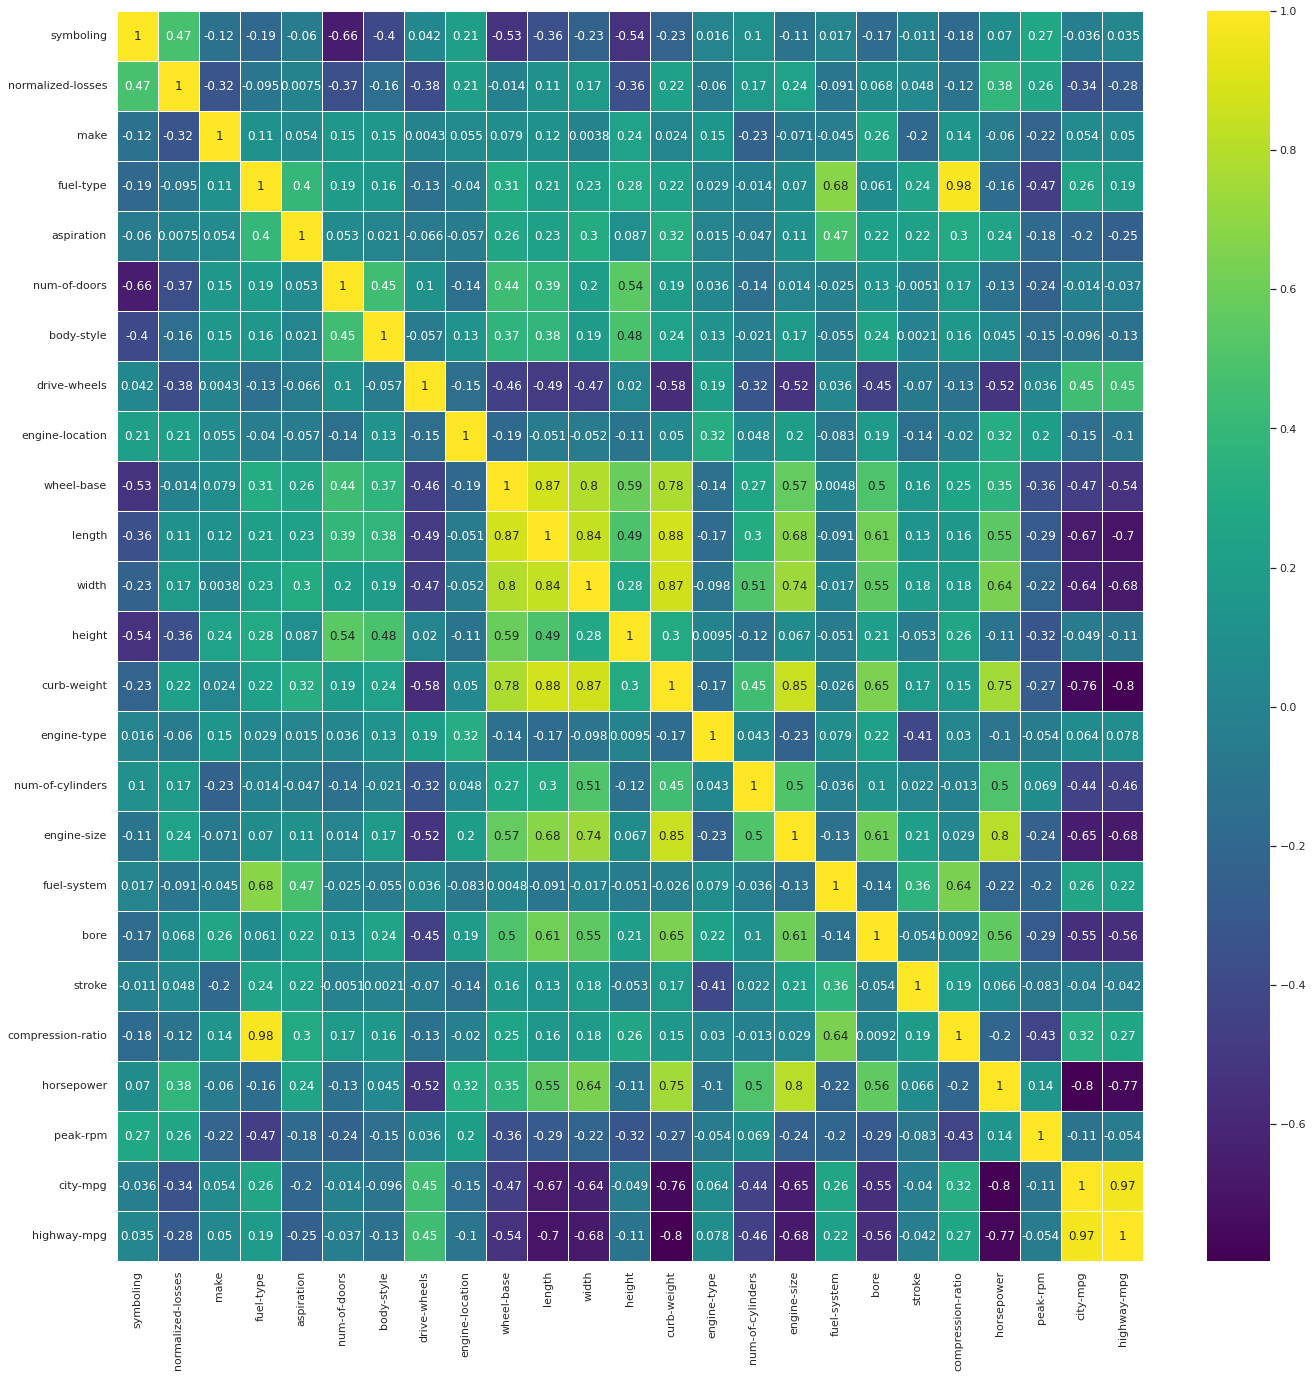

In [43]:
sns.set()
plt.figure(figsize=(23,23))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,cmap='viridis')
plt.show()

In [44]:
df[['symboling','make','num-of-doors','drive-wheels','height','city-mpg','normalized-losses']].groupby(['make','num-of-doors','drive-wheels','height','city-mpg']).mean()

symboling  normalized-losses
make num-of-doors drive-wheels height city-mpg                              
0    2.0          0            48.8   21              3.0                NaN
                               52.4   19              1.0                NaN
1    2.0          1            53.1   19              2.0              161.0
                  2            52.0   16              0.0              161.0
     4.0          1            54.3   24              2.0              164.0
...                                                   ...                ...
21   4.0          0            56.2   23             -2.0              103.0
                                      24             -2.0              103.0
                               57.5   17             -1.0               74.0
                                      23             -1.0               74.0
                                      24             -1.0               74.0

[153 rows x 2 columns]

In [45]:
df[(df['num-of-doors']==2)&(df['normalized-losses'].isnull())]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,3,NaN,0,0,0,2.0,0,0,0,88.6,168.8,64.1,48.8,2548,0,0,130,0,3.47,2.68,9.0,111.0,5000.0,21,27
1,3,NaN,0,0,0,2.0,0,0,0,88.6,168.8,64.1,48.8,2548,0,0,130,0,3.47,2.68,9.0,111.0,5000.0,21,27
2,1,NaN,0,0,0,2.0,1,0,0,94.5,171.2,65.5,52.4,2823,1,1,152,0,2.68,3.47,9.0,154.0,5000.0,19,26
44,1,NaN,6,0,0,2.0,2,1,0,94.5,155.9,63.6,52.0,1874,2,0,90,1,3.03,3.11,9.6,70.0,5400.0,38,43
46,2,NaN,6,0,0,2.0,1,0,0,96.0,172.6,65.2,51.4,2734,2,0,119,4,3.43,3.23,9.2,90.0,5000.0,24,29
75,1,NaN,10,0,1,2.0,1,0,0,102.7,178.4,68.0,54.8,2910,2,0,140,0,3.78,3.12,8.0,175.0,5000.0,19,24
131,2,NaN,16,0,0,2.0,1,1,0,96.1,176.8,66.6,50.5,2460,2,0,132,0,3.46,3.90,8.7,62.0,4800.0,23,31


In [46]:
index=df[(df['num-of-doors']==2)&(df['normalized-losses'].isnull())].index
df.iloc[index]=df.iloc[index].fillna(161)

In [47]:
mode=df['normalized-losses'].mode()
mode[0]

161.0

In [48]:
df['normalized-losses'].fillna(mode[0],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    int64  
 3   fuel-type          205 non-null    int64  
 4   aspiration         205 non-null    int64  
 5   num-of-doors       205 non-null    float64
 6   body-style         205 non-null    int64  
 7   drive-wheels       205 non-null    int64  
 8   engine-location    205 non-null    int64  
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    int64  
 15  num-of-cylinders   205 non-null    int64  
 16  engine-size        205 non

In [49]:
df=pd.concat([df,y],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    int64  
 3   fuel-type          205 non-null    int64  
 4   aspiration         205 non-null    int64  
 5   num-of-doors       205 non-null    float64
 6   body-style         205 non-null    int64  
 7   drive-wheels       205 non-null    int64  
 8   engine-location    205 non-null    int64  
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    int64  
 15  num-of-cylinders   205 non-null    int64  
 16  engine-size        205 non

In [50]:
test=df[df['price'].isnull()]
x_test=test.drop('price',axis=1)

In [51]:
train=df.dropna()
x_train=train.drop('price',axis=1)
y_train=train.price.astype(float)

In [52]:
from sklearn.preprocessing import StandardScaler

s=StandardScaler()

In [53]:
columns=['normalized-losses','wheel-base','length','width','height','curb-weight','engine-size','horsepower','peak-rpm','city-mpg','highway-mpg']
df_new=x_train[columns]
x_train[columns]=s.fit_transform(df_new)

In [54]:
x_train

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,3,0.945365,0,0,0,2.0,0,0,0,-1.685107,-0.439409,-0.853460,-2.034081,-0.014858,0,0,0.075389,0,3.47,2.68,9.0,0.213741,-0.239407,-0.652249,-0.542288
1,3,0.945365,0,0,0,2.0,0,0,0,-1.685107,-0.439409,-0.853460,-2.034081,-0.014858,0,0,0.075389,0,3.47,2.68,9.0,0.213741,-0.239407,-0.652249,-0.542288
2,1,0.945365,0,0,0,2.0,1,0,0,-0.710103,-0.244152,-0.185597,-0.559713,0.518080,1,1,0.606234,0,2.68,3.47,9.0,1.360459,-0.239407,-0.964397,-0.689386
3,2,1.029546,1,0,0,4.0,2,1,0,0.165748,0.195176,0.148335,0.218425,-0.423766,2,0,-0.431327,0,3.19,3.40,10.0,-0.026270,0.806699,-0.184027,-0.100993
4,2,1.029546,1,0,0,4.0,2,2,0,0.099646,0.195176,0.243744,0.218425,0.520017,2,2,0.220165,0,3.19,3.40,8.0,0.320412,0.806699,-1.120471,-1.277779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,-0.906600,21,0,0,4.0,2,0,0,1.702619,1.187733,1.436357,0.709881,0.768075,2,0,0.340812,0,3.78,3.15,9.5,0.293744,0.597478,-0.340101,-0.395189
201,-1,-0.906600,21,0,1,4.0,2,0,0,1.702619,1.187733,1.388653,0.709881,0.956057,2,0,0.340812,0,3.78,3.15,8.7,1.520466,0.388256,-0.964397,-0.836484
202,-1,-0.906600,21,0,0,4.0,2,0,0,1.702619,1.187733,1.436357,0.709881,0.884353,1,1,1.112950,0,3.58,2.87,8.8,0.827102,0.806699,-1.120471,-1.130681
203,-1,-0.906600,21,1,1,4.0,2,0,0,1.702619,1.187733,1.436357,0.709881,1.281633,2,1,0.437329,6,3.01,3.40,23.0,0.080402,-0.657850,0.128120,-0.542288


In [55]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split

In [56]:
x_train,x_valid,y_train,y_valid=train_test_split(x_train,y_train,test_size=0.2,random_state=8)

In [57]:
print(x_train.shape)
print(y_train.shape)
print(x_valid.shape)
print(y_valid.shape)


lr=LinearRegression()
svr=SVR(C=10)
ada=AdaBoostRegressor()
rf=RandomForestRegressor()
ridge=Ridge()
lasso=Lasso()
models=[lr,svr,ada,rf,ridge,lasso]


for model in models:
    model.fit(x_train,y_train)
    print(model,':',mean_absolute_error(model.predict(x_valid),y_valid))


(160, 25)
(160,)
(41, 25)
(41,)
LinearRegression() : 1951.1018472269536
SVR(C=10) : 5733.566599559467
AdaBoostRegressor() : 1558.7758187313864
RandomForestRegressor() : 1308.5652845528452
Ridge() : 2066.645429620027
Lasso() : 1945.4886356201675


In [58]:
for i in range(1,25):
    pca=PCA(n_components=i)
    x_new=pca.fit_transform(x_train)
    x_valid_new=pca.transform(x_valid)
    print(i)

    for model in models:
        model.fit(x_new,y_train)
        print(model,':',mean_absolute_error(model.predict(x_valid_new),y_valid))

1
LinearRegression() : 6149.235312411466
SVR(C=10) : 5765.65644205385
AdaBoostRegressor() : 5925.294895326148
RandomForestRegressor() : 3810.3800696864114
Ridge() : 6149.2191586759955
Lasso() : 6149.223227495229
2
LinearRegression() : 6107.540412954554
SVR(C=10) : 5765.442290746946
AdaBoostRegressor() : 4074.839824414751
RandomForestRegressor() : 2939.823292682927
Ridge() : 6107.53758098188
Lasso() : 6107.591285535826
3
LinearRegression() : 2926.5677196420856
SVR(C=10) : 5714.314217930658
AdaBoostRegressor() : 2729.2108868424393
RandomForestRegressor() : 2090.482282229965
Ridge() : 2926.8494639913365
Lasso() : 2926.5968727476293
4
LinearRegression() : 2611.794966132565
SVR(C=10) : 5710.438064998102
AdaBoostRegressor() : 2519.582346643846
RandomForestRegressor() : 2081.438617886179
Ridge() : 2611.8351603930505
Lasso() : 2611.771405778732
5
LinearRegression() : 2578.2846201043944
SVR(C=10) : 5710.93110657954
AdaBoostRegressor() : 2533.2414601268515
RandomForestRegressor() : 2047.66837398

In [59]:
pca=PCA(n_components=21)
x_new=pca.fit_transform(x_train)
x_valid_new=pca.transform(x_valid)

for model in models:
    model.fit(x_new,y_train)
    print(model,':',mean_absolute_error(model.predict(x_valid_new),y_valid))

LinearRegression() : 2327.9134055809286
SVR(C=10) : 5717.842500356176
AdaBoostRegressor() : 2035.1411600491588
RandomForestRegressor() : 1646.679268292683
Ridge() : 2319.274925439069
Lasso() : 2325.6585194698832


In [60]:
x_train=pd.concat([x_train,x_valid],axis=0)
y_train=pd.concat([y_train,y_valid],axis=0)

print(x_train.shape)
print(y_train.shape)

(201, 25)
(201,)


In [61]:
df_new=x_test[columns]
x_test[columns]=s.fit_transform(df_new)

In [62]:
x_new=pca.fit_transform(x_train)
rf.fit(x_new,y_train)
x_test_t=pca.transform(x_test)
fill_val=rf.predict(x_test_t)
print(fill_val)

[19639.495  6744.18   7525.38  27345.49 ]


In [63]:
x_test['price']=fill_val

In [64]:
x_test

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
9,0,-0.577350,1,0,1,2.0,1,2,0,1.228565,1.114841,0.291414,0.577350,0.751861,2,2,0.054166,0,3.13,3.40,7.0,0.145554,-0.087370,-1.045946,-1.297771,19639.495
44,1,-0.577350,6,0,0,2.0,2,1,0,-0.985065,-0.996492,-0.901995,0.577350,-1.012207,2,0,-0.834152,1,3.03,3.11,9.6,-0.862126,-0.786334,0.999460,0.973329,6744.180
45,0,-0.577350,6,0,0,4.0,2,1,0,-0.985065,-0.996492,-0.901995,0.577350,-0.959839,2,0,-0.834152,1,3.03,3.11,9.6,-0.862126,-0.786334,0.999460,0.973329,7525.380
129,1,1.732051,15,0,0,2.0,1,0,0,0.741566,0.878144,1.512576,-1.732051,1.220185,6,6,1.614139,0,3.94,3.11,10.0,1.578699,1.660038,-0.952973,-0.648886,27345.490


In [68]:
x_train['price']=y_train

In [69]:
x_train

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
4,2,1.029546,1,0,0,4.0,2,2,0,0.099646,0.195176,0.243744,0.218425,0.520017,2,2,0.220165,0,3.19,3.40,8.0,0.320412,0.806699,-1.120471,-1.277779,17450.0
99,0,-0.597939,12,0,0,4.0,1,1,0,-0.263915,-0.065167,-0.328710,0.382243,-0.448959,2,0,-0.165904,1,3.33,3.47,8.5,-0.159609,0.179035,0.284194,0.487400,8949.0
167,2,0.187743,19,0,0,2.0,4,0,0,-0.065609,0.162633,-0.137892,-0.723532,-0.030361,2,0,0.461458,0,3.62,3.50,9.3,0.347080,-0.657850,-0.184027,-0.100993,8449.0
146,0,-1.074960,18,0,0,4.0,3,1,0,-0.296966,-0.057031,-0.233301,-0.313986,-0.514850,5,0,-0.455456,1,3.62,2.64,9.0,-0.559627,-0.657850,0.440268,0.193204,7463.0
18,2,-0.177038,3,0,0,2.0,1,1,0,-1.718158,-2.693002,-2.666233,-0.232076,-2.069088,3,3,-1.589534,1,2.91,3.03,9.5,-1.466334,-0.030186,3.405672,3.282268,5151.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,2,1.029546,1,0,0,4.0,2,1,0,0.165748,0.195176,0.148335,0.218425,-0.423766,2,0,-0.431327,0,3.19,3.40,10.0,-0.026270,0.806699,-0.184027,-0.100993,13950.0
175,-1,-1.748402,19,0,0,4.0,1,1,0,0.595411,0.113819,0.291449,0.054606,-0.274543,2,0,-0.117645,0,3.31,3.54,8.7,-0.292948,-1.913177,0.284194,0.193204,9988.0
127,3,1.646867,15,0,0,2.0,4,0,1,-1.536378,-0.431274,-0.424119,-0.887351,0.388237,5,1,1.619666,0,3.74,2.90,9.5,2.773855,1.643584,-1.276544,-0.836484,34028.0
148,0,-1.187201,18,0,0,4.0,3,2,0,-0.313491,-0.048895,-0.233301,0.464153,-0.262916,5,0,-0.455456,1,3.62,2.64,9.0,-0.559627,-0.657850,-0.340101,-0.248091,8013.0


In [70]:
df_x=pd.concat([x_train,x_test],axis=0)
